In [20]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [121]:
Animal_ID = ['EJT76','EJT83','EJT84','EJT79','EJT89','EJT90','EJT93','EJT94']

baseline_mice = ['EJT76','EJT83','EJT84']

InputPath = ('D:\Behavioural_data_output\\')

OutputPath = ('D:\Behavioural_data_output\\')

In [122]:
import scipy.io
import os, importlib
import matplotlib.pyplot as plt
import statistics
import scipy.stats
import numpy as np
import pandas as pd
from ast import literal_eval
import pickle
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
import ptitprince as pt


In [123]:
def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def convolve_movmean(y,N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

def plot_across_animals(data,xlabel,ylabel,Animal_ID,windowsize):

    fig,ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_ylim([0, 1])
    for animals in range(len(Animal_ID)):
        ax.plot(data[animals][0:int(len(data[animals])*0.8)], color = 'grey',alpha = 0.5) ## only plot 90% of the data to avoid end of last session dip dominating the moving average. 

    cc_vecs = conactinate_nth_items(data)   
    medianPPerfs = [] 
    for item in cc_vecs:
        medianPPerfs = medianPPerfs + [np.median(item)]
    covlved_medianPPerfs = convolve_movmean(medianPPerfs,windowsize)

    ax.plot(covlved_medianPPerfs[0:int(len(covlved_medianPPerfs)*0.8)], color = 'firebrick')  

    patch1 = mpatches.Patch(color='grey', label=('n = ' + str(len(Animal_ID))))
    plt.legend(handles=[patch1])

    ax.set_xlabel(xlabel,fontsize = 20)
    ax.set_ylabel(ylabel,fontsize = 20)
    
    ax.set_xlim(0,8000)

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name, bbox_inches='tight')
    plt.close()

In [124]:
#Define list
AA_TrialsToFullTask = []
AA_PerfectScores = []
AA_TrialsPerSessions = []


#Trials to full session, pull data out of animal ID, looping around each animal ID to pull out perfect score trials, trials per session, trials to full task 
for Animal_index, CurrentAnimal in enumerate(Animal_ID):

    InputPathCurrent = (InputPath + CurrentAnimal+'\\AcrossSessions\\AnalysisOutput\\')
    
    with open (InputPathCurrent + 'PerfectScore_trials' , 'rb') as fp:
        PerfectCount = pickle.load(fp)        
    AA_PerfectScores = AA_PerfectScores + [PerfectCount]
    
    with open (InputPathCurrent + 'TrialsPerSessions' , 'rb') as fp:
        TrialsPerSessions = pickle.load(fp)        
    AA_TrialsPerSessions = AA_TrialsPerSessions + [TrialsPerSessions]#
    
    with open (InputPathCurrent + 'Trials_to_Full_Task' , 'rb') as fp:
        TrialsToFullTask = pickle.load(fp)        
    AA_TrialsToFullTask = AA_TrialsToFullTask + [TrialsToFullTask]#
    
    

#training levels 
for Animal_index, CurrentAnimal in enumerate(Animal_ID):
    
    all_TrainingLevels = []
    trials_per_session = []
    
    InputPathCurrent = (InputPath + CurrentAnimal)
    if os.path.isdir(InputPathCurrent):
        for progress, file in enumerate(os.listdir(InputPathCurrent+ '\\Preprocessed\\')):
            
            CurrentInputPath = (InputPathCurrent + '\\Preprocessed\\'+file+'\\')
            
            
            with open (CurrentInputPath+'Preprocessed_TrainingLevels' , 'rb') as fp:
                current_TrainingLevels = list(pickle.load(fp))
            all_TrainingLevels = all_TrainingLevels + [current_TrainingLevels]
            
            trials_per_session = trials_per_session + [len(current_TrainingLevels)]


# session id for each trial
session_id = []
for index,item in enumerate(trials_per_session):
    session_id = session_id +  ([index]*item)
    

#Create data frame to contain data wanted; want this data frame for Trials, this then includes trials to full task, trials per session, cohort of mice and then naming these nice via group list these will always be in order
Trials_df = pd.DataFrame(
    {'trials_to_full': AA_TrialsToFullTask,
    'trials_per_session': AA_TrialsPerSessions,
     'cohort': niave_mice,
     'Group':  #error here because not added enough group names for the extra cohort added, but if created loop containing group names before do not need to list this way, add in before and Group can be group
     
    })

ValueError: arrays must all be same length

In [ ]:
# look at data frame to visualise the data you have and what you want to work with
Trials_df

In [137]:
#to group together which cohort of animals are in the animal ID to concatinate them together for plotting. Aim of this is to use a loop to loop through animal IDs to group together/concatenate data ie concatinate baseline mice together and if not in the baseline mouse list but is in the animal id list will be grouped into lesion cohort

group = []
for index,animal in enumerate(Animal_ID):
    if animal in baseline_mice:
        group = group + ['Baseline']
    else:
        group = group + ['Lesion']
        
        
    

In [138]:
#then can look at how this grouped these mice together
group

['Baseline',
 'Baseline',
 'Baseline',
 'Lesion',
 'Lesion',
 'Lesion',
 'Lesion',
 'Lesion']

In [139]:
#TTF = trials to full 
#Next then need to create a dataframe to include trials to full task, the groups now created and the animal ID as reference. This can now be plotted in their concatenated groups just created 

TTF_compare_df = pd.DataFrame(
    {'trials_to_full': AA_TrialsToFullTask,
     'Group': group,
     'Animal': Animal_ID
     })

#create loop 

In [140]:
TTF_compare_df

trials_to_full     Group Animal
0            2956  Baseline  EJT76
1            1918  Baseline  EJT83
2            2428  Baseline  EJT84
3            1954    Lesion  EJT79
4           10088    Lesion  EJT89
5            6210    Lesion  EJT90
6            2148    Lesion  EJT93
7            6210    Lesion  EJT94

In [141]:
f, ax = plt.subplots(figsize=(7, 7))

#sns.barplot(y = "trials_to_full", x = "Group", data = Trials_df, capsize = .1)

sns.barplot(y = "Group", x = "trials_to_full", data = TTF_compare_df+, capsize = .1)

SyntaxError: invalid syntax (<ipython-input-141-e88637ff2ae1>, line 5)

Text(0.5, 1.0, 'Trials to full task')

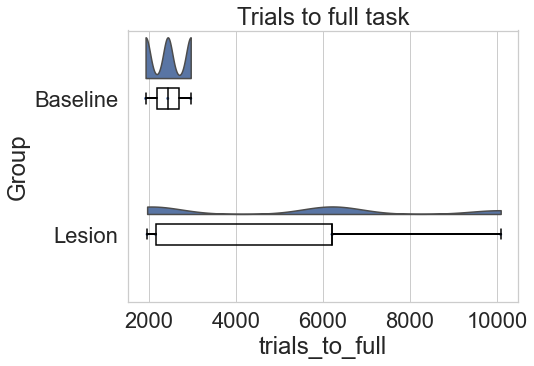

In [136]:
f, ax = plt.subplots(figsize=(7,5))
dy="Group"; dx="trials_to_full"; ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = TTF_compare_df, palette = pal, bw = .2, cut = 0.,
                     scale = "area", width = .6, inner=None, orient = ort )

ax=sns.stripplot( x = dx, y = dy, data = TTF_compare_df, palette = pal, edgecolor = "white", 
                size = 3, jitter = 0, zorder = 0, orient = ort)

ax=sns.boxplot(x = dx, y = dy, data = TTF_compare_df, color = "black", width = .15, zorder = 10,\
              showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
              showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
              saturation = 1 , orient = ort)

plt.title("Trials to full task")

In [29]:
Trials_df = pd.DataFrame(
    {'trials_to_full': AA_TrialsToFullTask,
    'trials_per_session': AA_TrialsPerSessions,
    })

In [39]:
Trials_df["trials_to_full"]

0    2956
1    1918
2    2428
Name: trials_to_full, dtype: int64

In [46]:
Trials_df

trials_to_full                                 trials_per_session
0            2956  [85, 172, 116, 159, 111, 299, 199, 220, 232, 4...
1            1918  [78, 51, 228, 933, 514, 464, 645, 526, 482, 62...
2            2428  [82, 43, 173, 501, 531, 477, 478, 319, 429, 43...

In [ ]:
##pointplot/scatter Hernando code

fig, axs = plt.subplots(ncols=1, nrows=1, sharey=False, figzie=(6,4))
for i, trials in enumerate(AA_TrialsToFullTask):
    sns.pointplot(data=AA_TrialsToFullTask,
                 x='Baseline_Mice'
                 order=hue_order,
                 y=var )